### **Objective**: To build an algorithm to detect fraudulent transaction by training a given dataset

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Training/Testing Split
from sklearn.model_selection import train_test_split
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# Model Building
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Performance metrics
import sklearn.metrics as skm
# Dimensionality Reduction
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Sampling Methods
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

**Reading the dataset**

In [2]:
df = pd.read_csv('creditcard.csv')
pd.pandas.set_option('display.max_columns', None)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Summary of the dataset
- Total Data Instances : 284807 entries, 0 to 284807 
- Total Data Columns : 30 Columns
- int type Data: 01
- float type Data: 30

### Univariate Analysis for categorical variables

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# to get the propertions, just set normalise = True)
df.Class.value_counts(normalize= True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

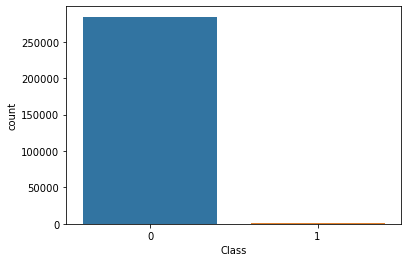

In [7]:
# bargraph for class
sns.countplot(x = 'Class', data = df)

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

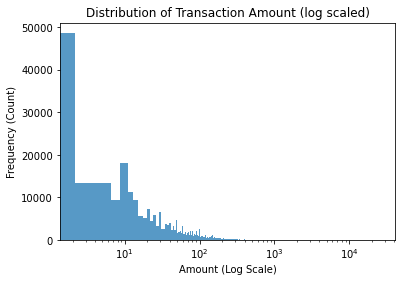

In [10]:
# Distribution
sns.histplot(data=df, x='Amount').set(xscale="log")
plt.xlabel("Amount (Log Scale)")
plt.ylabel("Frequency (Count)")
plt.title("Distribution of Transaction Amount (log scaled)")
plt.show()

### Summary of univariate analysis
- It can be vivdly seen that dataset have class imbalance with the target feature
- Apart from Time and Amount. rest of the features are confidential; no name for numerical predictors
- There are no missing values, which signifies the data has been pre-processed before hand

### Data Cleaning

In [11]:
# Lets check for any duplicate values
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [12]:
# There are 1081 duplicate rows, consequently I'm removing from the given dataset
df.drop_duplicates(keep='last', inplace=True)

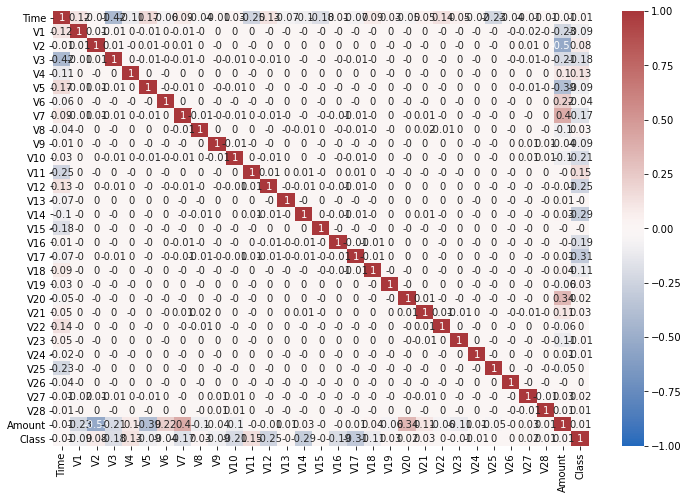

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
# Visualizing the correlation matrix
f = plt.figure(figsize=(12, 8))
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, 
            center=0, cmap='vlag')
plt.show()
plt.gcf()

In [14]:
#From the above heat map Amount and Time has some correlation with the other features with 0.4 co-efficients.
#It would be diificult to assess relation with such low values

In [15]:
# Splitting data by class(fraud)
df_no_fraud = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]

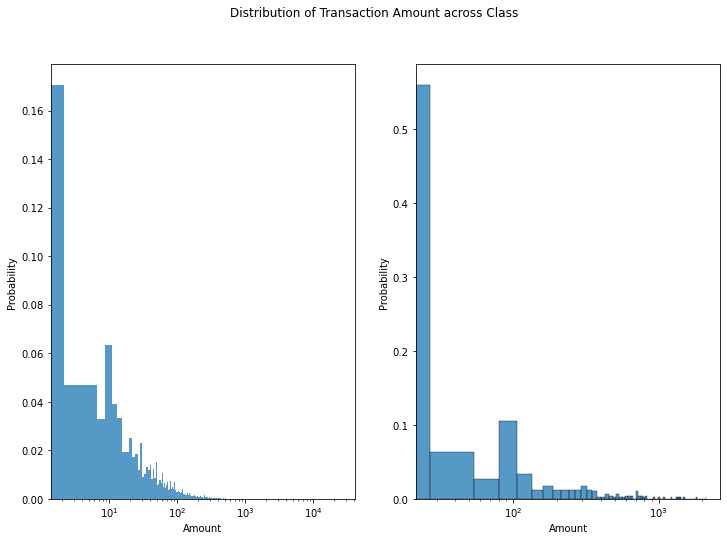

In [16]:
# Histogram for Amount Distribution per class 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Distribution of Transaction Amount across Class')
sns.histplot(ax=ax1, data=df_no_fraud, x='Amount', stat='probability').set(xscale="log")
sns.histplot(ax=ax2, data=df_fraud, x='Amount', stat='probability').set(xscale="log")
plt.show()

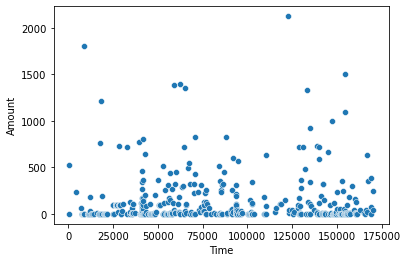

In [17]:
# Scatterplot
sns.scatterplot(data=df_fraud, x='Time', y='Amount')
plt.show()

In [18]:
# There's no clustering pattern from the above graph, consequently we can assume fradulent transactions took place in random time.

In [19]:
# lets split the data as X (dependent features) and y (independent feature)
X = df.loc[:, df.columns != 'Class']
y = df.loc[:,'Class']

- SMOTE (Synthetic Minority Oversampling Technique) is an oversampling approach on the minority class. In context, it would mean to randomly increase fraud examples by "artificially" replicating to have a more balanced class distribution

In [21]:
#SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

print('Shape of X before SMOTE: {} Shape of X after SMOTE: {}'.format(X.shape, X_sm.shape))

print('Balance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (283726, 30) Shape of X after SMOTE: (566506, 30)
Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Class, dtype: float64

* Near-Miss Algorithm: It is an undersampling approach on the majority class. In context, we select examples to keep out of the training set based on the distance of majority class examples to minority class examples

In [24]:
##Near Miss Algorithm
nr = NearMiss()

X_nmiss, y_nmiss = nr.fit_resample(X, y)

print('Shape of X before NearMiss Algorithm: {} Shape of X after NearMiss Algorithm: {}'.format(X.shape, X_nmiss.shape))

print('\nBalance of positive and negative classes (%):')
y_nmiss.value_counts(normalize=True) * 100

Shape of X before NearMiss Algorithm: (283726, 30) Shape of X after NearMiss Algorithm: (946, 30)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Class, dtype: float64

-Note:
-With the risk of overfitting with oversampling and the possibility to lose valuable information from undersampling, we will also consider combining both to rebalance the distribution.


In [25]:
## Combined Random Sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# Oversampling minority class
X_over, y_over = over.fit_resample(X, y)

# Comine with under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print('Shape of X before Combined Random Sampler: {} Shape of X after Combined Random Sampler: {}'.format(X.shape,X_combined_sampling.shape ))

print('Balance of positive and negative classes (%):')
y_combined_sampling.value_counts(normalize=True) * 100

Shape of X before Combined Random Sampler: (283726, 30) Shape of X after Combined Random Sampler: (318658, 30)
Balance of positive and negative classes (%):


0    55.555486
1    44.444514
Name: Class, dtype: float64

### Dimensionality Reduction

I'll perform dimensionality reduction to trim down the number of features. In doing so, we hope to a have simpler, but effective machine learning model structure and avoid any potential case of overfitting. We will be testing two different methods from Linear Algebra: PCA, SVD on a simple Logistic Regression model and pick the best performing.

In [26]:
#lets split the data using train_test_split method
X, y = X_combined_sampling, y_combined_sampling

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

- PCA (Principal Component Analysis) takes data with m-columns to be projected to a subspace with n-features (n < m) while preserving the crucial information from the original data; in other words, PCA attempts in finding the principal components (or features) as its names denotes

In [31]:
#PCA
dimred_steps = dict()
pca_pipe = [('pca', PCA()), 
             ('m', LogisticRegression(solver='liblinear'))]

# Create & Evaluate model
dimred_steps.update({'PCA': pca_pipe})

- SVD (Singular Value Decomposition) is a process which breaks down a matrix into its constituents elements by factorizing it into three seperate metrices: M=UΣVᵗ.

- M: original matrix
- U: left singular matrix (columns are left singular vectors) containing eigenvectors of matrix MMᵗ
- Σ: a diagonal matrix containing singular (eigen)values
- V: right singular matrix (columns are right singular vectors) containing eigenvectors of matrix MᵗM.


In [32]:
##Linear Discriminant Analysis
# Define the pipeline
lda_pipe = [('lda', LinearDiscriminantAnalysis()), 
             ('m', LogisticRegression())]

dimred_steps.update({'LDA': lda_pipe})

In [33]:
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
for name, steps in dimred_steps.items():
    model = Pipeline(steps=steps)
    n_scores = cross_val_score(model, X_train, y_train, 
                               scoring='average_precision', cv=cv, 
                               n_jobs=-1)
    # report performance
    print(name+' - Average Precision Score: %.3f' % (np.mean(n_scores)))

PCA - Average Precision Score: 0.983
LDA - Average Precision Score: 0.974


In [34]:
# so PCA performed well so I use this to build the model

In [35]:
# Dictionary to store model structures
model_steps = dict()

In [36]:
## Logistic Regression
logreg_steps = [('lda', LinearDiscriminantAnalysis()), 
                ('m', LogisticRegression())]
model_steps.update({'Logistic Regression':logreg_steps})

In [37]:
## k-Nearest Neighbors
knn_steps = [('lda', LinearDiscriminantAnalysis()),  
             ('m', KNeighborsClassifier(n_neighbors=2))]
model_steps.update({'k-Nearest Neighbors':knn_steps})

In [38]:
## Decision Tree
tree_steps = [('lda', LinearDiscriminantAnalysis()), 
               ('m', DecisionTreeClassifier())]
model_steps.update({'Decision Tree':tree_steps})

In [39]:
# Checking the dictionary of models
model_steps

{'Logistic Regression': [('lda', LinearDiscriminantAnalysis()),
  ('m', LogisticRegression())],
 'k-Nearest Neighbors': [('lda', LinearDiscriminantAnalysis()),
  ('m', KNeighborsClassifier(n_neighbors=2))],
 'Decision Tree': [('lda', LinearDiscriminantAnalysis()),
  ('m', DecisionTreeClassifier())]}

In [40]:
# Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
for name, model_steps in model_steps.items():
    model = Pipeline(steps=model_steps)
    n_scores = cross_val_score(model, X_train, y_train, 
                               scoring='average_precision', cv=cv, 
                               n_jobs=-1)
    # report performance
    print(name+' - Average Precision Score: %.3f (%.3f)' % (np.mean(n_scores), 
                                                            np.std(n_scores)))

Logistic Regression - Average Precision Score: 0.974 (0.001)
k-Nearest Neighbors - Average Precision Score: 0.997 (0.000)
Decision Tree - Average Precision Score: 0.996 (0.001)
